In [4]:
################################################################
# Import Python Libraries
################################################################
import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

from Configure.Constants  import *
from Configure.AtomicData import *
from Configure.PlanetData  import *
from Configure.Conversions import amu2GeV

# Capture rate computation without darkphoton

Here we will tweak the DarkCapPy code to compute the capture rate assuming a constant cross-section for the $\chi$-SM scattering.

$\sigma_{SI} = 10^{-42} cm^2$


### Second attempt

We do the same computation as before, except that we integrate over velocity from 0 to $v_{gal}$ for every element.

In [6]:
sigma = 1e-42 # constant cross-section






########################
# Photon Velocity and Energy Integration
########################
def intDuDEr(element, rIndex):
	'''
	intDuDER(element, m_X, rIndex):

	Returns the evaluated velocity and recoil energy integrals for dark photon scattering

	[m_X] = GeV
	'''
    
	def integrand(u):
		fu = fCrossInterp(u)
		integrand = sigma * u * fu * (u **2 + escVel2_List[rIndex])

		return integrand

	uLow = 0
	uHigh = V_gal 
	integral = integrate.quad(integrand, uLow, uHigh)[0]
	return integral



Evaluating the velocity integral over the different element and at all radi

In [7]:
mx = np.logspace(1, 2, 20)

```python
velocityIntegral = np.empty((len(radius_List), len(element_List)))
for i in range(len(radius_List)) :
    for j, element in enumerate(element_List) :
        velocityIntegral[i, j] = intDuDEr(element, i)
velocityIntegral = pd.DataFrame(data = velocityIntegral, columns = element_List)
velocityIntegral.to_csv('data/NP2_velocityIntegral')
```

In [8]:
velocityIntegral = pd.read_csv('data/NP2_velocityIntegral', index_col = 0)

In [9]:
velocityIntegral

,O16,Na,Mg,Al,Si,P,S,Ca,Cr,Fe,Ni
0,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47
1,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47
2,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47,7.917975e-47
3,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47,7.917974e-47
4,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47,7.917973e-47
...,...,...,...,...,...,...,...,...,...,...,...
486,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47,7.907908e-47
487,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47,7.907870e-47
488,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47,7.907833e-47
489,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47,7.907814e-47


In [10]:

########################
# Sum Over Radii
########################
def sumOverR(element):
	'''
	sumOverR(element, m_X)

	Returns the summation over radius of the velocity and recoil energy integration

	[m_X] = GeV
	'''

	tempSum = 0
    
	for i in range(0, len(radius_List)):
		r = radius_List[i]
		deltaR = deltaR_List[i]

		n_N = numDensity_Func(element)[i]
		summand = n_N * r**2 * velocityIntegral[element][i] * deltaR 
		tempSum += summand
	return tempSum



```python
sumOverRadi = np.empty(len(element_List))

for j, element in enumerate(element_List) :
    
    sumOverRadi[j] = sumOverR(element)
        
sumOverRadi = pd.DataFrame(data = sumOverRadi).transpose()
sumOverRadi.columns = element_List
sumOverRadi.to_csv('data/NP2sumOverRadi')
```

In [12]:
sumOverRadi = pd.read_csv('data/NP2sumOverRadi', index_col = 0)
sumOverRadi

,O16,Na,Mg,Al,Si,P,S,Ca,Cr,Fe,Ni
0,419.735291,1.791755,144.999464,13.284551,130.028211,0.529721,4.42926,9.653912,2.019516,127.890983,6.904787


In [13]:
def singleElementCap(element, m_X):
	'''
	singleElementCap(element, m_X)

	Returns the capture rate due to a single element for the specified parameters

	[m_X] = GeV
	'''
	n_X = 0.3/m_X # GeV/cm^3

	conversion = (5.06e13)**-3 * (1.52e24) # Conversion to seconds (cm^-3)(GeV^-2) -> (s^-1)
	prefactors = (4*np.pi)**2
	function = n_X * conversion * prefactors * sumOverRadi[element]
	return function

In [18]:
########################
# Full Capture Rate
########################
def cCap(m_X):
	'''
	cCap(m_X, m_A, epsilon, alpha, alpha_X)

	returns the full capture rate in sec^-1 for the specified parameters

	Note: This function is the less efficient way to perform this calculation. Every point in (m_A, epsilon) space 
		involves peforming the full tripple integral over recoil energy, incident DM velocity, and Earth radius
		which is time consuming.

	[m_X] = GeV
	'''
	totalCap = 0
	for element in element_List:
		elementCap = singleElementCap(element, m_X)
		totalCap += elementCap 
	return totalCap


In [19]:
capNoPhoton = np.empty_like(mx)

In [20]:
for i, m in enumerate(mx) :
    capNoPhoton[i] = cCap(m)


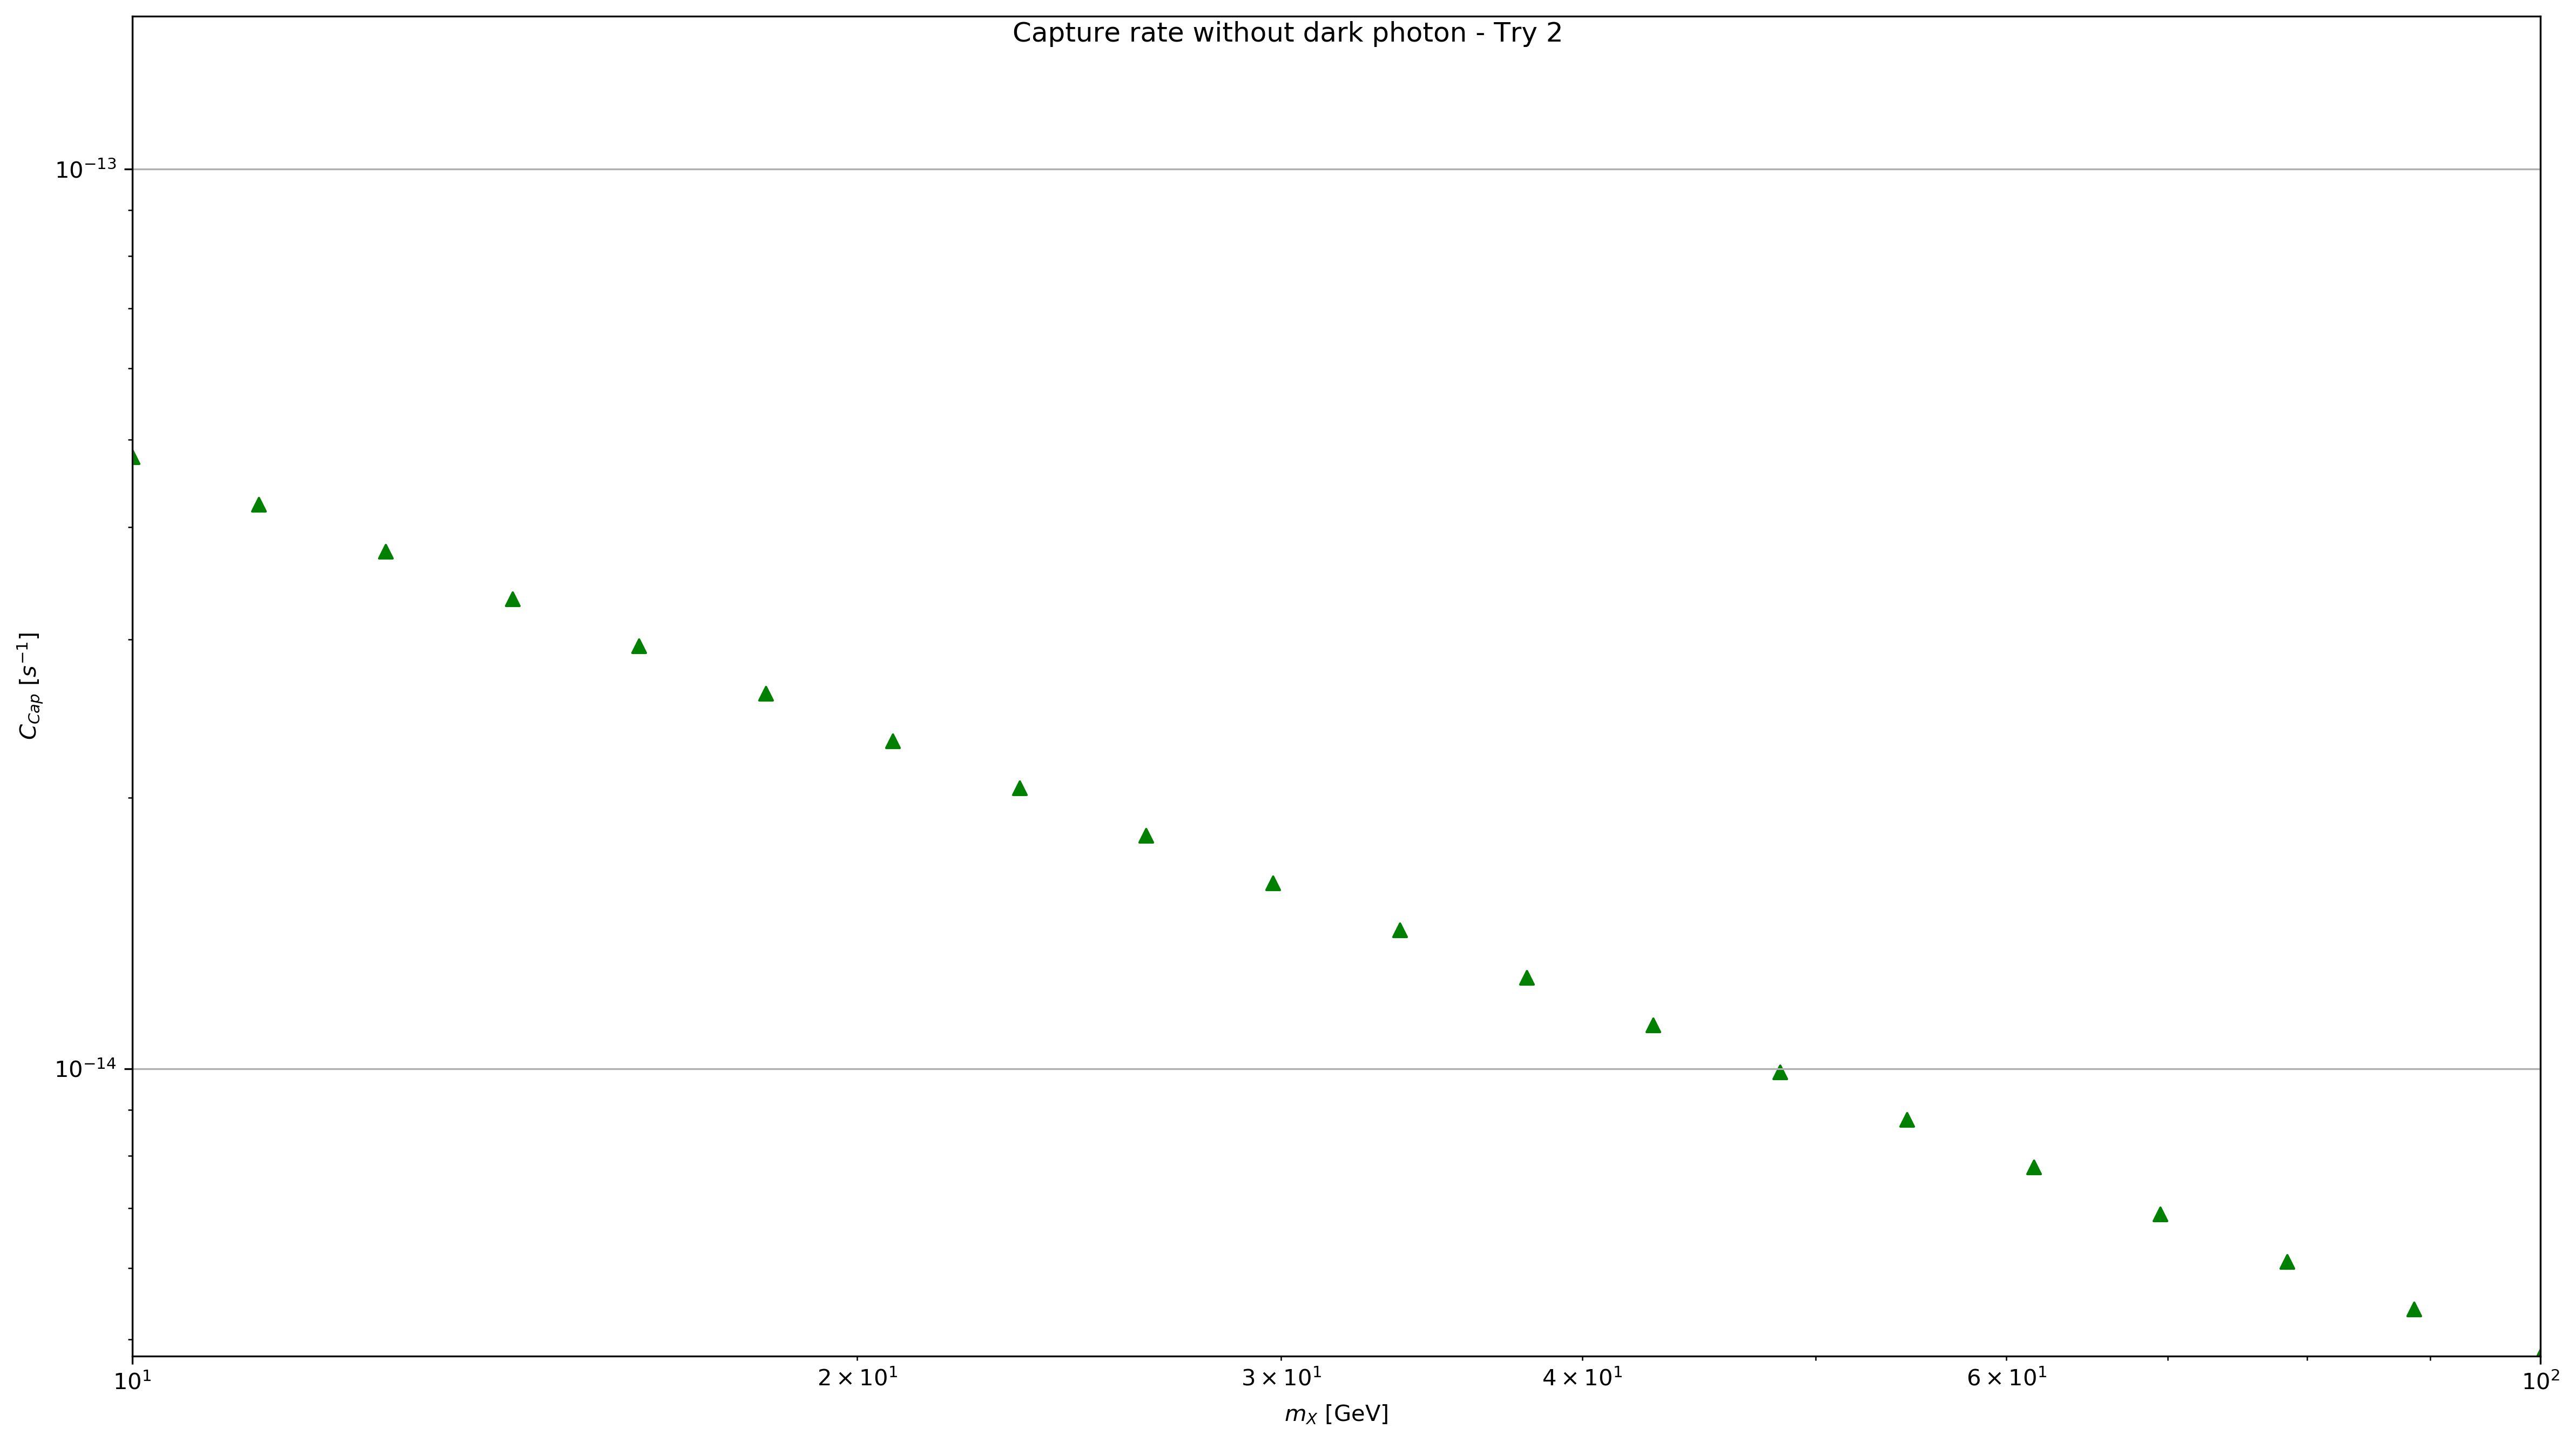

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (16, 9), dpi = 300)

ax.scatter(mx, capNoPhoton, marker = '^', color = 'g')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10, 100)
ax.set_ylim(np.amin(capNoPhoton), np.amax(capNoPhoton)+ 1e-13)
ax.grid()

ax.set_ylabel('$C_{Cap}$ [$s^{-1}$]')
ax.set_xlabel('$m_X$ [GeV]')

fig.suptitle("Capture rate without dark photon - Try 2")
fig.tight_layout()

In [28]:
fig.savefig("data/Capture_rate_NP2")

That turned out quite bad.The assumption that there is no dependance on the recoil energy is not a good one..

It is quite evident that the integration over velocity should be done upon the value that makes it possible for DM to scatter off nucleus (ie Emax>Emin). So there should still be a heaviside theta function in there somewhere..
That's what was still coded in the first try, the upper limit for velocity was given by the minimum of the galactic escape velocity and the velocity corresponding to Emax = Emin.

We should keep that limit for the next try.